In [1]:
import pandas as pd
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import pickle
import numpy as np

#Save all nodes
df_full = pd.read_csv("../../data/test.csv")
unique_sources = set(df_full['Source'].unique())
unique_destinations = set(df_full['Destination'].unique())
unique_nodes = unique_sources.union(unique_destinations)
nodes = {node: i for i, node in enumerate(list(unique_nodes))}



adjacency_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)

for i, row in df_full.iterrows():
    src_index = nodes[row['Source']]
    dest_index = nodes[row['Destination']]
    adjacency_matrix[src_index, dest_index] += 1
    if i == 747334:
        break

print(adjacency_matrix)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0   132     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10275     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10276     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    58     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0 10276     0     0
      0     0     0     0     0    

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib notebook

# Normalize the adjacency matrix to the range [0, 1]
normalized_adjacency_matrix = np.log1p(adjacency_matrix) / np.log1p(np.max(adjacency_matrix))

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(normalized_adjacency_matrix)

# Plot the graph with varying edge opacities and red color
pos = nx.spring_layout(G, k=0.8)  # Layout for the graph
nx.draw_networkx_nodes(G, pos, node_size=80)
for (u, v), opacity in np.ndenumerate(normalized_adjacency_matrix):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=opacity, edge_color='red', width=2)

nx.draw_networkx_labels(G, pos, font_size=6)

# Create a custom color map using the original unscaled opacity values
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=np.min(adjacency_matrix), vmax=np.max(adjacency_matrix))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label='Packages sent')
cbar.set_ticks(np.linspace(np.min(adjacency_matrix), np.max(adjacency_matrix), num=5))  # Set the tick locations
cbar.set_ticklabels(np.linspace(np.min(adjacency_matrix), np.max(adjacency_matrix), num=5))  # Set the tick labels

# Show plot
plt.axis('off')
plt.show()

NameError: name 'np' is not defined

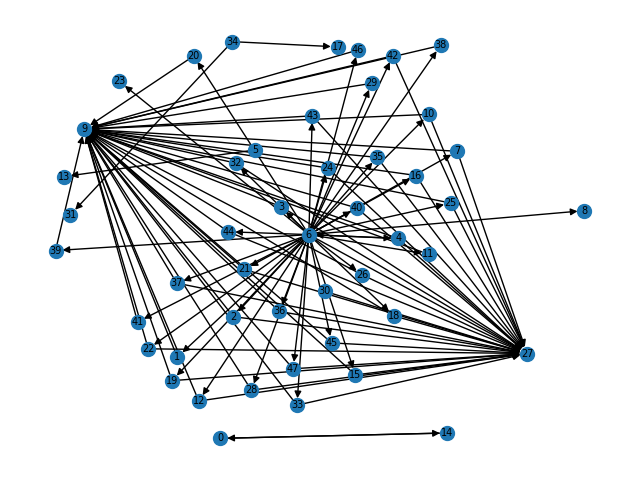

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib widget
# Create a directed NetworkX graph
G = nx.DiGraph()

# Add nodes
num_nodes = adjacency_matrix.shape[0]
G.add_nodes_from(range(num_nodes))

# Add directed edges based on the adjacency matrix
for i in range(num_nodes):
    for j in range(num_nodes):
        if adjacency_matrix[i][j] != 0:
            G.add_edge(i, j)

# Plot the graph
pos = nx.spring_layout(G, k=1)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_size=100, edge_color='black', linewidths=1, font_size=7)
plt.show()